In [1]:
from fastai.vision import *
import sys

import pose
import models.cs_v2 as cs
%load_ext autoreload
%autoreload 2

In [2]:
root = Path('../../LIP').resolve()
transforms = [pose.pose_flip_lr(p=0.5)], None
data = (pose.PoseItemList.from_folder(root)
        .split_by_folder('train_images', 'val_images')
        .label_from_func(pose.LIPLabel(root /'pose_annotations'))
        .transform(transforms, tfm_y=True, size=128, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch(bs=32)
        .normalize(imagenet_stats))

data

ImageDataBunch;

Train: LabelList (30462 items)
x: PoseItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: PoseLabelList
Pose (8/16) (128, 128),Pose (7/16) (128, 128),Pose (6/16) (128, 128),Pose (14/16) (128, 128),Pose (1/16) (128, 128)
Path: /home/labs/waic/omrik/LIP;

Valid: LabelList (10000 items)
x: PoseItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: PoseLabelList
Pose (14/16) (128, 128),Pose (16/16) (128, 128),Pose (10/16) (128, 128),Pose (16/16) (128, 128),Pose (10/16) (128, 128)
Path: /home/labs/waic/omrik/LIP;

Test: None

In [9]:
instructor = cs.SingleInstruction()
c_out = 16
learner = cs.cs_learner(data, models.resnet18, c_out, instructor,
                        loss_func=pose.ce_pose_loss, callback_fns=pose.Pckh)

In [10]:
learner.lr_find()

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-02
Min loss divided by 10: 1.58E-01


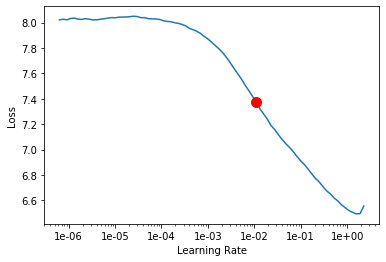

In [11]:
learner.recorder.plot(suggestion=True)

In [12]:
lr = 1e-2
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,4.088062,3.853063,0.804811,0.651694,0.464611,0.431521,0.423304,0.417486,0.462623,0.592836,0.531363,00:52
1,3.864678,3.655420,0.832063,0.700822,0.541169,0.490629,0.446594,0.465041,0.486701,0.645391,0.575837,00:52
2,3.645458,3.475204,0.855038,0.719260,0.578759,0.526913,0.492540,0.488962,0.520971,0.673905,0.607019,00:52
3,3.447810,3.280309,0.869205,0.762953,0.637568,0.591986,0.544595,0.569472,0.569331,0.718821,0.657847,00:52
4,3.367197,3.230143,0.870956,0.766975,0.648875,0.602751,0.555948,0.577932,0.579383,0.725659,0.665914,00:53


In [13]:
learner.unfreeze()

In [14]:
learner.lr_find()

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.58E-07


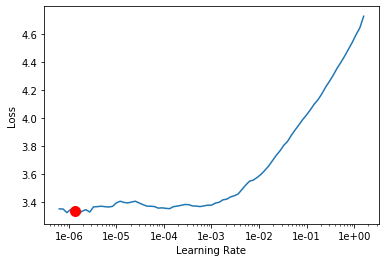

In [15]:
learner.recorder.plot(suggestion=True)

In [16]:
learner.fit_one_cycle(10, slice(1.3e-6, lr/10))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,3.347628,3.216441,0.871677,0.769948,0.653419,0.606401,0.554379,0.581726,0.578382,0.728597,0.667859,00:55
1,3.352097,3.216211,0.875335,0.770948,0.646844,0.605923,0.554539,0.582712,0.582486,0.728077,0.668122,00:55
2,3.271233,3.210340,0.873274,0.774390,0.652734,0.605383,0.559782,0.592956,0.586028,0.729746,0.671608,00:56
3,3.277058,3.212617,0.876623,0.776899,0.663196,0.615861,0.567650,0.593265,0.592285,0.736330,0.677566,00:56
4,3.194428,3.163269,0.878735,0.781074,0.670607,0.620621,0.566724,0.607519,0.597618,0.740911,0.682609,00:57
5,3.188055,3.222655,0.878477,0.783110,0.670508,0.619780,0.570103,0.606650,0.600869,0.741138,0.683499,00:56
6,3.147098,3.156231,0.880332,0.784569,0.672214,0.624630,0.574262,0.610451,0.603958,0.743556,0.686425,00:56
7,3.117504,3.163287,0.880641,0.786140,0.674075,0.623087,0.573662,0.609274,0.602640,0.744117,0.686392,00:56
8,3.054034,3.299915,0.880229,0.786037,0.675420,0.625080,0.574757,0.609743,0.602251,0.744798,0.686993,00:56
9,3.077064,3.257577,0.880074,0.786610,0.675440,0.624297,0.575956,0.610002,0.605193,0.744718,0.687471,00:56


In [19]:
data = (pose.PoseItemList.from_folder(root)
        .split_by_folder('train_images', 'val_images')
        .label_from_func(pose.LIPLabel(root /'pose_annotations'))
        .transform(transforms, tfm_y=True, size=224, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch(bs=16)
        .normalize(imagenet_stats))


In [20]:
learner.data = data

In [21]:
learner.lr_find()

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.91E-06
Min loss divided by 10: 6.92E-05


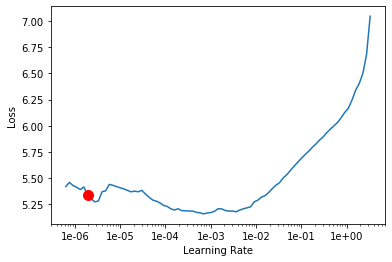

In [22]:
learner.recorder.plot(suggestion=True)

In [23]:
learner.fit_one_cycle(10, slice(1.9e-6, lr/10))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,4.425261,4.127706,0.892026,0.795172,0.678047,0.648384,0.542639,0.561431,0.547718,0.756431,0.677451,01:37
1,4.278203,4.027662,0.901350,0.806759,0.700155,0.673958,0.571916,0.611175,0.604094,0.773353,0.704562,01:39
2,4.232169,3.967832,0.903204,0.812145,0.717206,0.680134,0.590648,0.633020,0.614137,0.780859,0.715835,01:36
3,4.132782,3.925115,0.903668,0.817462,0.727768,0.694621,0.605526,0.652617,0.625203,0.788445,0.726399,01:39
4,4.013943,3.891104,0.907068,0.825039,0.738865,0.705156,0.616189,0.661356,0.649653,0.796511,0.736683,01:37
5,3.954705,3.867889,0.909798,0.833285,0.745641,0.708209,0.624922,0.675109,0.659249,0.801720,0.743968,01:36
6,3.956162,3.857858,0.909128,0.835006,0.751871,0.712856,0.634117,0.679767,0.660936,0.804618,0.747907,01:37
7,3.794610,3.861681,0.910159,0.836783,0.754457,0.714935,0.631215,0.676962,0.662804,0.806462,0.748451,01:38
8,3.806630,3.864038,0.910931,0.837671,0.752867,0.715312,0.632848,0.680100,0.665737,0.806595,0.749489,01:39
9,3.807043,3.865756,0.911550,0.838296,0.753581,0.717210,0.635526,0.679966,0.665740,0.807543,0.750461,01:38


epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


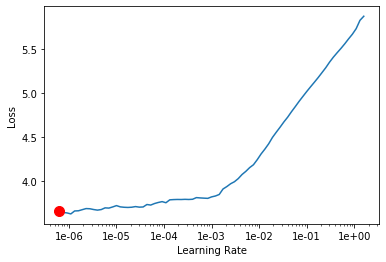

In [25]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [26]:
learner.fit_one_cycle(20, slice(1.1e-7, 5e-5))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,3.774397,3.861259,0.910674,0.837932,0.753643,0.716995,0.635355,0.681536,0.666744,0.807183,0.750519,01:40
1,3.767042,3.861590,0.910056,0.837615,0.753415,0.716707,0.635745,0.680232,0.665042,0.806822,0.750008,01:37
2,3.758518,3.867259,0.909850,0.838400,0.755215,0.717888,0.636185,0.681606,0.666982,0.807690,0.750989,01:37
3,3.778236,3.867185,0.909747,0.838295,0.753529,0.717025,0.634706,0.680951,0.666896,0.807022,0.750264,01:38
4,3.767044,3.867525,0.909540,0.838817,0.754133,0.716824,0.637004,0.682602,0.666893,0.807196,0.750923,01:38
5,3.752624,3.868859,0.910622,0.839183,0.752654,0.717086,0.634436,0.682270,0.668755,0.807276,0.750742,01:38
6,3.765087,3.871001,0.910262,0.838870,0.754936,0.717776,0.635201,0.681746,0.667520,0.807824,0.750997,01:38
7,3.741619,3.874020,0.910313,0.838872,0.754844,0.717381,0.635857,0.682202,0.666208,0.807717,0.750948,01:36
8,3.716999,3.874389,0.910056,0.838662,0.754506,0.716758,0.635422,0.683047,0.667747,0.807370,0.750939,01:36
9,3.727157,3.883575,0.910674,0.837459,0.752634,0.716971,0.635044,0.681213,0.668517,0.806822,0.750396,01:38


epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-05


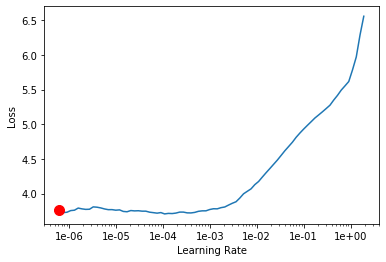

In [27]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [28]:
learner.fit_one_cycle(10, slice(1.e-5, 1e-3))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,3.736913,3.893213,0.909592,0.837043,0.753479,0.714886,0.630337,0.680492,0.666518,0.806128,0.748953,01:39
1,3.845662,3.899456,0.908098,0.827131,0.739711,0.696564,0.622802,0.674004,0.661263,0.795430,0.739839,01:39
2,3.934624,3.874006,0.907222,0.834848,0.747322,0.711457,0.628474,0.674854,0.660533,0.802628,0.745171,01:37
3,3.847826,3.873034,0.910004,0.831040,0.748474,0.714434,0.629630,0.683306,0.658452,0.803376,0.746646,01:38
4,3.822575,3.865640,0.909695,0.838716,0.752639,0.716029,0.630870,0.689076,0.675164,0.806662,0.751368,01:38
5,3.708302,3.863240,0.909489,0.839707,0.757694,0.722669,0.637377,0.696210,0.677201,0.809680,0.755323,01:38
6,3.666037,3.850061,0.911395,0.846703,0.763699,0.726054,0.637487,0.698187,0.682438,0.814248,0.758966,01:38
7,3.491185,3.877813,0.912786,0.848219,0.768818,0.729310,0.639949,0.701085,0.684757,0.817039,0.761669,01:37
8,3.478955,3.900809,0.911498,0.849469,0.767360,0.730133,0.643160,0.703121,0.686313,0.816866,0.762468,01:38
9,3.446379,3.901337,0.912631,0.848791,0.768755,0.731220,0.642623,0.703175,0.687927,0.817587,0.763012,01:38
